In [1]:
import tensorflow as tf

# if tf.__version__[0] == "2":
#     tf.compat.v1.disable_eager_execution()

import warnings
warnings.filterwarnings('ignore')
from keras.models import load_model

from art import config
from art.utils import load_dataset, get_file
from art.estimators.classification import KerasClassifier
from art.attacks.evasion import FastGradientMethod
from art.attacks.evasion import BasicIterativeMethod
from art.defences.trainer import AdversarialTrainer
from art.attacks.evasion import ProjectedGradientDescent


import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import os
import os.path
import glob
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold                                                                                                                       
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
from tensorflow.keras.preprocessing.image import img_to_array
# from keras.utils import np_utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.imagenet_utils import preprocess_input
from skimage import io
import warnings
import tqdm

from xgboost import XGBClassifier


In [2]:
X_train = np.load('X_train.npy')
Y_train = np.load('Y_train.npy').argmax(axis=1)
X_test = np.load('X_test.npy')
Y_test = np.load('Y_test.npy').argmax(axis=1)


##################################################################
##################################################################

X = np.concatenate((X_train,X_test), axis=0)
Y = np.concatenate((Y_train, Y_test), axis=0)
print(X.shape)
print(Y.shape)

##################################################################
##################################################################
X_train_Adv = np.load('x_train_adv_eps=0.10.npy')
X_test_Adv = np.load('x_test_adv_eps=0.10.npy')

X_adv = np.concatenate((X_train_Adv,X_test_Adv), axis=0)
Y_adv = np.concatenate((Y_train, Y_test), axis=0)

print(X_adv.shape)
print(Y_adv.shape)
##################################################################
##################################################################

dataset = np.concatenate((X_adv, X), axis=0)
label = np.concatenate((Y_adv, Y), axis=0)


print(dataset.shape)
print(label.shape)
# X_ = np.concatenate((X_train, X_test, x_train_adv, x_test_adv), axis=0)
# Y_ = np.concatenate((Y_train, Y_test,Y_train, Y_test ), axis=0)

(5840, 224, 224, 3)
(5840,)
(5840, 224, 224, 3)
(5840,)
(11680, 224, 224, 3)
(11680,)


In [11]:
model = load_model('Resnet152V2_best_model.h5')
# model.summary()


print('######### Experiment with Original Samples')
y_pred = model.predict(X_test).argmax(axis=1)
print(accuracy_score(Y_test,y_pred))
print()

# print('######### Experiment with Adversarial Samples')
# y_pred = model.predict(X_test_Adv).argmax(axis=1)
# print(accuracy_score(Y_test,y_pred))


# print('######### Experiment with JPEG-Adversarial Samples')
# y_pred = model.predict(spatial_images[0]).argmax(axis=1)
# print(accuracy_score(Y_test.argmax(axis=1),y_pred))

2023-10-30 13:54:09.237341: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Ultra
2023-10-30 13:54:09.237378: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2023-10-30 13:54:09.237386: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2023-10-30 13:54:09.237419: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-30 13:54:09.237437: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


######### Experiment with Original Samples


2023-10-30 13:54:17.774890: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 37s 1s/step
0.9102564102564102



In [12]:

# X_test_Adv_1 = np.load('x_test_adv_FGM_01.npy')
# X_test_Adv_2 = np.load('x_test_adv_FGM_02.npy')
# X_test_Adv_3 = np.load('x_test_adv_FGM_03.npy')
# X_test_Adv_4 = np.load('x_test_adv_FGM_04.npy')
# X_test_Adv_5 = np.load('x_test_adv_FGM_05.npy')
# X_test_Adv_6 = np.load('x_test_adv_FGM_06.npy')
# X_test_Adv_7 = np.load('x_test_adv_FGM_07.npy')
# X_test_Adv_8 = np.load('x_test_adv_FGM_08.npy')
# X_test_Adv_9 = np.load('x_test_adv_FGM_09.npy')
# X_test_Adv_10 = np.load('x_test_adv_FGM_10.npy')

In [13]:
# print('######### Experiment with Adversarial Samples')
# y_pred = model.predict(X_test_Adv_1).argmax(axis=1)
# print(accuracy_score(Y_test,y_pred))

# print('######### Experiment with Adversarial Samples')
# y_pred = model.predict(X_test_Adv_2).argmax(axis=1)
# print(accuracy_score(Y_test,y_pred))

# print('######### Experiment with Adversarial Samples')
# y_pred = model.predict(X_test_Adv_3).argmax(axis=1)
# print(accuracy_score(Y_test,y_pred))

# print('######### Experiment with Adversarial Samples')
# y_pred = model.predict(X_test_Adv_4).argmax(axis=1)
# print(accuracy_score(Y_test,y_pred))

# print('######### Experiment with Adversarial Samples')
# y_pred = model.predict(X_test_Adv_5).argmax(axis=1)
# print(accuracy_score(Y_test,y_pred))

# print('######### Experiment with Adversarial Samples')
# y_pred = model.predict(X_test_Adv_6).argmax(axis=1)
# print(accuracy_score(Y_test,y_pred))

# print('######### Experiment with Adversarial Samples')
# y_pred = model.predict(X_test_Adv_7).argmax(axis=1)
# print(accuracy_score(Y_test,y_pred))

# print('######### Experiment with Adversarial Samples')
# y_pred = model.predict(X_test_Adv_8).argmax(axis=1)
# print(accuracy_score(Y_test,y_pred))

# print('######### Experiment with Adversarial Samples')
# y_pred = model.predict(X_test_Adv_9).argmax(axis=1)
# print(accuracy_score(Y_test,y_pred))

# print('######### Experiment with Adversarial Samples')
# y_pred = model.predict(X_test_Adv_10).argmax(axis=1)
# print(accuracy_score(Y_test,y_pred))

In [14]:
# import plotly.express as px
# from sklearn.decomposition import PCA


# # df = px.data.iris()
# # X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# pca = PCA(n_components=2)
# components = pca.fit_transform(X_train_Adv_1.reshape((X_train.shape[0],-1)))


# fig = px.scatter(components, x=0, y=1, color=Y_train, template="simple_white")

# fig.show()

In [12]:
# data = (X - X.min()) / (X.max() - X.min())
# # images[0]

# jepg = JpegCompression(clip_values=(0.,1.))
# jepg_images = jepg.__call__(data)

# base_model = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)
# org_features = base_model.predict(jepg_images[0])
# org_features.shape


# data = (X_adv - X_adv.min()) / (X_adv.max() - X_adv.min())
# # images[0]

# jepg = JpegCompression(clip_values=(0.,1.))
# jepg_images = jepg.__call__(data)
# adv_features = base_model.predict(jepg_images[0])
# adv_features.shape


# data = (X - X.min()) / (X.max() - X.min())
# # images[0]

# jepg = SpatialSmoothing(clip_values=(0.,1.))
# jepg_images = jepg.__call__(data)

# base_model = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)
# org_features = base_model.predict(jepg_images[0])
# org_features.shape


# data = (X_adv - X_adv.min()) / (X_adv.max() - X_adv.min())
# # images[0]

# jepg = SpatialSmoothing(clip_values=(0.,1.))
# jepg_images = jepg.__call__(data)
# adv_features = base_model.predict(jepg_images[0])
# adv_features.shape

In [15]:
from keras.layers import GaussianNoise
base_model = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)


# org_features = base_model.predict(X)
# org_features.shape


# adv_features = base_model.predict(X_adv)
# adv_features.shape


#########################################################

# # base_model = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)
# X_train = base_model.predict(X_train)
# X_train.shape


# X_train_Adv = base_model.predict(X_train_Adv)
# X_train_Adv.shape

In [70]:
# from art.attacks.evasion import ProjectedGradientDescent

# classifier = KerasClassifier(model=model, use_logits=False, clip_values=[0,255])
#attack = ProjectedGradientDescent(classifier, eps=0.10, eps_step=0.01, max_iter=10, targeted=True, 
#                                  num_random_init=False) 
#x_train_adv = attack.generate(X_train, y=Y_train)


# attacks = BasicIterativeMethod(classifier, eps=0.3, eps_step=0.01, max_iter=40)
# x_train_adv = attacks.generate(X_train)
# np.save('x_train_attacks_dataset_eps_from_0.01_to_0.3.npy', x_train_adv)


# attack = FastGradientMethod(classifier, eps=0.01)
# x_train_adv = attack.generate(X_train)
# np.save('x_train_adv_FGM_01.npy', x_train_adv)


# attack = FastGradientMethod(classifier, eps=0.02)
# x_train_adv = attack.generate(X_train)
# np.save('x_train_adv_FGM_02.npy', x_train_adv)

# attack = FastGradientMethod(classifier, eps=0.03)
# x_train_adv = attack.generate(X_train)
# np.save('x_train_adv_FGM_03.npy', x_train_adv)


# attack = FastGradientMethod(classifier, eps=0.04)
# x_train_adv = attack.generate(X_train)
# np.save('x_train_adv_FGM_04.npy', x_train_adv)


# attack = FastGradientMethod(classifier, eps=0.05)
# x_train_adv = attack.generate(X_train)
# np.save('x_train_adv_FGM_05.npy', x_train_adv)

# attack = FastGradientMethod(classifier, eps=0.06)
# x_train_adv = attack.generate(X_train)
# np.save('x_train_adv_FGM_06.npy', x_train_adv)

# attack = FastGradientMethod(classifier, eps=0.07)
# x_train_adv = attack.generate(X_train)
# np.save('x_train_adv_FGM_07.npy', x_train_adv)

# attack = FastGradientMethod(classifier, eps=0.08)
# x_train_adv = attack.generate(X_train)
# np.save('x_train_adv_FGM_08.npy', x_train_adv)

# attack = FastGradientMethod(classifier, eps=0.09)
# x_train_adv = attack.generate(X_train)
# np.save('x_train_adv_FGM_09.npy', x_train_adv)

# attack = FastGradientMethod(classifier, eps=0.10)
# x_train_adv = attack.generate(X_train)
# np.save('x_train_adv_FGM_10.npy', x_train_adv)



# y_adv_pred = classifier.predict(X_test_adv)
# accuracy = np.mean(np.argmax(y_adv_pred, axis=1) == np.argmax(y_test[:n], axis=1))
# print("Accuracy on first %i adversarial test samples: %f" % (n, accuracy))
# np.save('X_test_Adv_FGM_03.npy', x_test_adv)

In [71]:
# attack = FastGradientMethod(classifier, eps=0.01)
# x_test_adv = attack.generate(X_test)
# np.save('x_test_adv_FGM_01.npy', x_test_adv)

# attack = FastGradientMethod(classifier, eps=0.02)
# x_test_adv = attack.generate(X_test)
# np.save('x_test_adv_FGM_02.npy', x_test_adv)

# attack = FastGradientMethod(classifier, eps=0.03)
# x_test_adv = attack.generate(X_test)
# np.save('x_test_adv_FGM_03.npy', x_test_adv)

# attack = FastGradientMethod(classifier, eps=0.04)
# x_test_adv = attack.generate(X_test)
# np.save('x_test_adv_FGM_04.npy', x_test_adv)

# attack = FastGradientMethod(classifier, eps=0.05)
# x_test_adv = attack.generate(X_test)
# np.save('x_test_adv_FGM_05.npy', x_test_adv)

# attack = FastGradientMethod(classifier, eps=0.06)
# x_test_adv = attack.generate(X_test)
# np.save('x_test_adv_FGM_06.npy', x_test_adv)

# attack = FastGradientMethod(classifier, eps=0.07)
# x_test_adv = attack.generate(X_test)
# np.save('x_test_adv_FGM_07.npy', x_test_adv)

# attack = FastGradientMethod(classifier, eps=0.08)
# x_test_adv = attack.generate(X_test)
# np.save('x_test_adv_FGM_08.npy', x_test_adv)

# attack = FastGradientMethod(classifier, eps=0.09)
# x_test_adv = attack.generate(X_test)
# np.save('x_test_adv_FGM_09.npy', x_test_adv)

# attack = FastGradientMethod(classifier, eps=0.10)
# x_test_adv = attack.generate(X_test)
# np.save('x_test_adv_FGM_10.npy', x_test_adv)



In [16]:
X_train_Adv_1 = np.load('x_train_adv_FGM_01.npy')
X_train_Adv_2 = np.load('x_train_adv_FGM_02.npy')
X_train_Adv_3 = np.load('x_train_adv_FGM_03.npy')
X_train_Adv_4 = np.load('x_train_adv_FGM_04.npy')
X_train_Adv_5 = np.load('x_train_adv_FGM_05.npy')
X_train_Adv_6 = np.load('x_train_adv_FGM_06.npy')
X_train_Adv_7 = np.load('x_train_adv_FGM_07.npy')
X_train_Adv_8 = np.load('x_train_adv_FGM_08.npy')
X_train_Adv_9 = np.load('x_train_adv_FGM_09.npy')
X_train_Adv_10 = np.load('x_train_adv_FGM_10.npy')


X_train_Adv_1 = base_model.predict(X_train_Adv_1)
X_train_Adv_2 = base_model.predict(X_train_Adv_2)
X_train_Adv_3 = base_model.predict(X_train_Adv_3)
X_train_Adv_4 = base_model.predict(X_train_Adv_4)
X_train_Adv_5 = base_model.predict(X_train_Adv_5)
X_train_Adv_6 = base_model.predict(X_train_Adv_6)
X_train_Adv_7 = base_model.predict(X_train_Adv_7)
X_train_Adv_8 = base_model.predict(X_train_Adv_8)
X_train_Adv_9 = base_model.predict(X_train_Adv_9)
X_train_Adv_10 = base_model.predict(X_train_Adv_10)
X_train_ = base_model.predict(X_train)

# training_data = np.concatenate((X_train_Adv_1,X_train_Adv_2,X_train_Adv_3,X_train_Adv_4,X_train_Adv_5,X_train_Adv_6,X_train_Adv_7,X_train_Adv_8,X_train_Adv_9,X_train_Adv_10, X_train_),axis=0)
# training_label = np.concatenate((Y_train,Y_train,Y_train,Y_train,Y_train,Y_train,Y_train,Y_train,Y_train,Y_train,Y_train), axis=0).argmax(axis=1)

# training_data = np.hstack([X_train_,X_train_Adv_1,X_train_Adv_2,X_train_Adv_3,X_train_Adv_4,X_train_Adv_5,X_train_Adv_6,X_train_Adv_7,X_train_Adv_8,X_train_Adv_9,X_train_Adv_10])
# training_label = np.hstack([Y_train,Y_train,Y_train,Y_train,Y_train,Y_train,Y_train,Y_train,Y_train,Y_train,Y_train])

# print(training_data.shape)
# print(training_label.shape)
# ####################################################################

X_test_Adv_1 = np.load('x_test_adv_FGM_01.npy')
X_test_Adv_2 = np.load('x_test_adv_FGM_02.npy')
X_test_Adv_3 = np.load('x_test_adv_FGM_03.npy')
X_test_Adv_4 = np.load('x_test_adv_FGM_04.npy')
X_test_Adv_5 = np.load('x_test_adv_FGM_05.npy')
X_test_Adv_6 = np.load('x_test_adv_FGM_06.npy')
X_test_Adv_7 = np.load('x_test_adv_FGM_07.npy')
X_test_Adv_8 = np.load('x_test_adv_FGM_08.npy')
X_test_Adv_9 = np.load('x_test_adv_FGM_09.npy')
X_test_Adv_10 = np.load('x_test_adv_FGM_10.npy')

X_test_Adv_1 = base_model.predict(X_test_Adv_1)
X_test_Adv_2 = base_model.predict(X_test_Adv_2)
X_test_Adv_3 = base_model.predict(X_test_Adv_3)
X_test_Adv_4 = base_model.predict(X_test_Adv_4)
X_test_Adv_5 = base_model.predict(X_test_Adv_5)
X_test_Adv_6 = base_model.predict(X_test_Adv_6)
X_test_Adv_7 = base_model.predict(X_test_Adv_7)
X_test_Adv_8 = base_model.predict(X_test_Adv_8)
X_test_Adv_9 = base_model.predict(X_test_Adv_9)
X_test_Adv_10 = base_model.predict(X_test_Adv_10)
X_test_ = base_model.predict(X_test)

# test_data = np.hstack([X_test_,X_test_Adv_1,X_test_Adv_2,X_test_Adv_3,X_test_Adv_4,X_test_Adv_5,X_test_Adv_6,X_test_Adv_7,X_test_Adv_8,X_test_Adv_9,X_test_Adv_10])
# test_label = np.hstack([Y_test,Y_test,Y_test,Y_test,Y_test,Y_test,Y_test,Y_test,Y_test,Y_test,Y_test])


# print(test_data.shape)
# print(test_label.shape)

2023-10-30 13:55:07.041733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


163/163 [==============================] - 15s 93ms/step


2023-10-30 13:58:30.394072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 2s 96ms/step


In [73]:

training_data = np.hstack([X_train_Adv_1,X_train_Adv_2,X_train_Adv_3,X_train_Adv_4,X_train_Adv_5,X_train_Adv_6,X_train_Adv_7,X_train_Adv_8,X_train_Adv_9,X_train_Adv_10,X_train_])

print(training_data.shape)
# print(training_label.shape)
####################################################################


test_data = np.hstack([X_test_Adv_1,X_test_Adv_2,X_test_Adv_3,X_test_Adv_4,X_test_Adv_5,X_test_Adv_6,X_test_Adv_7,X_test_Adv_8,X_test_Adv_9,X_test_Adv_10,X_test_])


print(test_data.shape)
# print(test_label.shape)

(5216, 22528)
(624, 22528)


In [74]:
# np.hstack([X_train_Adv_1,X_train_,X_train_]).shape
# # np.concatenate((X_train_Adv_1,X_train_),axis=0).shape

In [75]:

# training_data = np.concatenate((X_train_Adv_1,X_train_),axis=0)
# training_label = np.concatenate((Y_train,Y_train), axis=0).argmax(axis=1)
# print(training_data.shape)
# print(training_label.shape)

# test_data = np.concatenate((X_test_Adv_1, X_test_),axis=0)
# test_label = np.concatenate((Y_test,Y_test), axis=0).argmax(axis=1)
# print(test_data.shape)
# print(test_label.shape)

In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=624)
components = pca.fit_transform(training_data)
components.shape

(5216, 624)

In [77]:
top_model = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
#  nthread=20,
 scale_pos_weight=1,
 seed=27)
# top_model = XGBClassifier(n_jobs=-1, max_depth = 5, min_child_weight = 1, gamma = 0, colsample_bytree = 0.8, scale_pos_weight = 1)
# top_model.fit(base_model.predict(x_train_adv), Y_train.argmax(axis=1))  # Training
top_model.fit(components,Y_train)   # Training


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              n_estimators=5000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [86]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix



y_pred = top_model.predict(pca.fit_transform(X_test_Adv_1))  # Testing

print("Test acurracy on Adv-1- Original: %.4f" %(accuracy_score(Y_test,y_pred) ) )


# y_pred = top_model.predict(pca.fit_transform(np.hstack([X_test_Adv_1,X_test.reshape((X_test.shape[0],-1))])))  # Testing

# print("Test acurracy on Adv-1- Original: %.4f" %(accuracy_score(Y_test,y_pred) ) )



yhat_classes = y_pred
testy = Y_test
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testy, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testy, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testy, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testy, yhat_classes)
print('F1 score: %f' % f1)
 
# # kappa
# kappa = cohen_kappa_score(testy, yhat_classes)
# print('Cohens kappa: %f' % kappa)
# # ROC AUC
# auc = roc_auc_score(testy, yhat_probs)
# print('ROC AUC: %f' % auc)
# # confusion matrix
# matrix = confusion_matrix(testy, yhat_classes)
# print(matrix)



Test acurracy on Adv-1- Original: 0.8397
Accuracy: 0.839744
Precision: 0.816594
Recall: 0.958974
F1 score: 0.882075


In [83]:


y_pred = top_model.predict(pca.fit_transform(X_test_Adv_1))  # Testing

print("Test acurracy on Adv-1- Original: %.4f" %(accuracy_score(Y_test,y_pred) ) )

y_pred = top_model.predict(pca.fit_transform(X_test_Adv_2))  # Testing

print("Test acurracy on Adv-2: %.4f" %(accuracy_score(Y_test,y_pred) ) )

y_pred = top_model.predict(pca.fit_transform(X_test_Adv_3))  # Testing

print("Test acurracy on Adv-3: %.4f" %(accuracy_score(Y_test,y_pred) ) )

y_pred = top_model.predict(pca.fit_transform(X_test_Adv_4))  # Testing

print("Test acurracy on Adv-4: %.4f" %(accuracy_score(Y_test,y_pred) ) )

y_pred = top_model.predict(pca.fit_transform(X_test_Adv_5))  # Testing

print("Test acurracy on Adv-5: %.4f" %(accuracy_score(Y_test,y_pred) ) )

y_pred = top_model.predict(pca.fit_transform(X_test_Adv_6))  # Testing

print("Test acurracy on Adv-6: %.4f" %(accuracy_score(Y_test,y_pred) ) )

y_pred = top_model.predict(pca.fit_transform(X_test_Adv_7))  # Testing

print("Test acurracy on Adv-7: %.4f" %(accuracy_score(Y_test,y_pred) ) )

y_pred = top_model.predict(pca.fit_transform(X_test_Adv_8))  # Testing

print("Test acurracy on Adv-8: %.4f" %(accuracy_score(Y_test,y_pred) ) )

y_pred = top_model.predict(pca.fit_transform(X_test_Adv_9))  # Testing

print("Test acurracy on Adv-9: %.4f" %(accuracy_score(Y_test,y_pred) ) )

y_pred = top_model.predict(pca.fit_transform(X_test_Adv_10))  # Testing

print("Test acurracy on Adv-10: %.4f" %(accuracy_score(Y_test,y_pred) ) )


Test acurracy on Adv-1- Original: 0.8638
Test acurracy on Adv-2: 0.9054
Test acurracy on Adv-3: 0.9087
Test acurracy on Adv-4: 0.9022
Test acurracy on Adv-5: 0.8830
Test acurracy on Adv-6: 0.8734
Test acurracy on Adv-7: 0.8574
Test acurracy on Adv-8: 0.8542
Test acurracy on Adv-9: 0.8462
Test acurracy on Adv-10: 0.8397


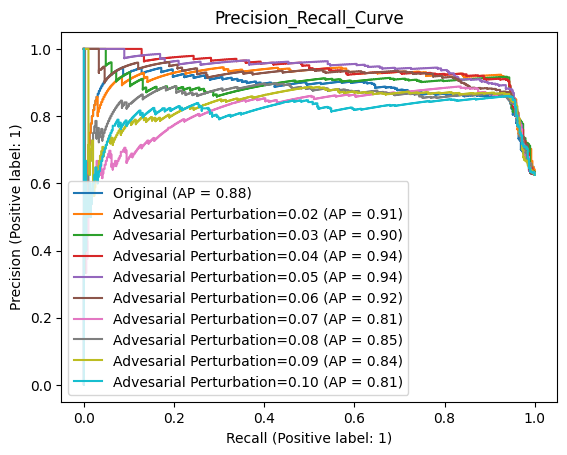

In [129]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.io as pio

# Import scikit-plot


plot_precision_recall_curve(top_model, pca.fit_transform(X_test_Adv_1), Y_test, ax = plt.gca(),name = "Original")
plot_precision_recall_curve(top_model, pca.fit_transform(X_test_Adv_2), Y_test, ax = plt.gca(),name = "Advesarial Perturbation=0.02")
plot_precision_recall_curve(top_model, pca.fit_transform(X_test_Adv_3), Y_test, ax = plt.gca(),name = "Advesarial Perturbation=0.03")
plot_precision_recall_curve(top_model, pca.fit_transform(X_test_Adv_4), Y_test, ax = plt.gca(),name = "Advesarial Perturbation=0.04")
plot_precision_recall_curve(top_model, pca.fit_transform(X_test_Adv_5), Y_test, ax = plt.gca(),name = "Advesarial Perturbation=0.05")
plot_precision_recall_curve(top_model, pca.fit_transform(X_test_Adv_6), Y_test, ax = plt.gca(),name = "Advesarial Perturbation=0.06")
plot_precision_recall_curve(top_model, pca.fit_transform(X_test_Adv_7), Y_test, ax = plt.gca(),name = "Advesarial Perturbation=0.07")
plot_precision_recall_curve(top_model, pca.fit_transform(X_test_Adv_8), Y_test, ax = plt.gca(),name = "Advesarial Perturbation=0.08")
plot_precision_recall_curve(top_model, pca.fit_transform(X_test_Adv_9), Y_test, ax = plt.gca(),name = "Advesarial Perturbation=0.09")
plot_precision_recall_curve(top_model, pca.fit_transform(X_test_Adv_10), Y_test, ax = plt.gca(),name = "Advesarial Perturbation=0.10")

plt.title('Precision_Recall_Curve')
plt.savefig('plot_precision_recall_curve.png', dpi=600)


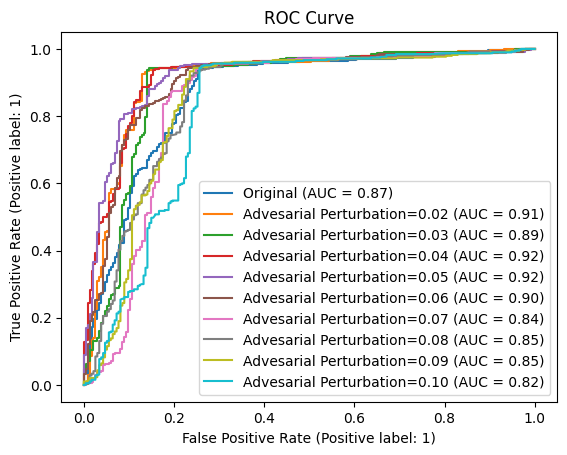

In [130]:
from sklearn.metrics import RocCurveDisplay

svc_disp_1 = RocCurveDisplay.from_estimator(top_model, pca.fit_transform(X_test_Adv_1), Y_test, name='Original',ax = plt.gca())
svc_disp_2 = RocCurveDisplay.from_estimator(top_model, pca.fit_transform(X_test_Adv_2), Y_test, name='Advesarial Perturbation=0.02', ax = plt.gca())
svc_disp_3 = RocCurveDisplay.from_estimator(top_model, pca.fit_transform(X_test_Adv_3), Y_test,name='Advesarial Perturbation=0.03',ax = plt.gca())
svc_disp_4 = RocCurveDisplay.from_estimator(top_model, pca.fit_transform(X_test_Adv_4), Y_test,name='Advesarial Perturbation=0.04',ax = plt.gca())
svc_disp_5 = RocCurveDisplay.from_estimator(top_model, pca.fit_transform(X_test_Adv_5), Y_test,name='Advesarial Perturbation=0.05',ax = plt.gca())
svc_disp_6 = RocCurveDisplay.from_estimator(top_model, pca.fit_transform(X_test_Adv_6), Y_test,name='Advesarial Perturbation=0.06',ax = plt.gca())
svc_disp_7 = RocCurveDisplay.from_estimator(top_model, pca.fit_transform(X_test_Adv_7), Y_test,name='Advesarial Perturbation=0.07',ax = plt.gca())
svc_disp_8 = RocCurveDisplay.from_estimator(top_model, pca.fit_transform(X_test_Adv_8), Y_test,name='Advesarial Perturbation=0.08',ax = plt.gca())
svc_disp_9 = RocCurveDisplay.from_estimator(top_model, pca.fit_transform(X_test_Adv_9), Y_test,name='Advesarial Perturbation=0.09',ax = plt.gca())
svc_disp_10 = RocCurveDisplay.from_estimator(top_model, pca.fit_transform(X_test_Adv_10), Y_test,name='Advesarial Perturbation=0.10',ax = plt.gca())
# svc_disp_1 = RocCurveDisplay.from_estimator(top_model, X_test_Adv_1, Y_test)

# ax = plt.gca()
svc_disp_10.plot(ax=ax, alpha=0.8)

plt.title('ROC Curve')

# plt.show()
plt.savefig('RocCurveDisplay.png', dpi=600)


In [179]:
a= pca.fit_transform(np.load('x_test_adv_FGM_01.npy').reshape((X_test.shape[0],-1)))
y_pred = top_model.predict(a)  # Testing

print("Test acurracy: %.4f" %(accuracy_score(Y_test,y_pred) ) )
# print("Test acurracy: %.4f" %(accuracy_score(test_label,y_pred) ) )

Test acurracy: 0.6218


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


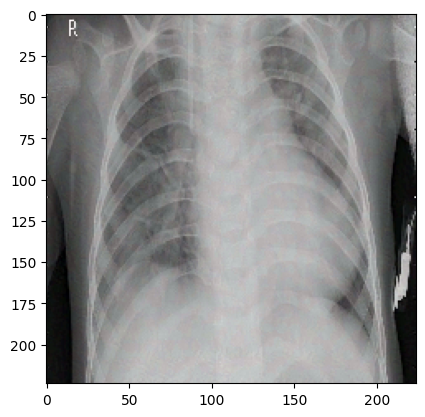

In [141]:

plt.imshow(np.load('x_test_adv_FGM_01.npy')[0])

In [18]:
# X_train_Adv_1 = np.load('x_train.adv_FGM_0.01.npy')
# X_train_Adv_2 = np.load('x_train.adv_FGM_0.02.npy')
# X_train_Adv_3 = np.load('x_train.adv_FGM_0.03.npy')
# X_train_Adv_4 = np.load('x_train.adv_FGM_0.04.npy')
# X_train_Adv_5 = np.load('x_train.adv_FGM_0.05.npy')

# X_train_Adv_1 = base_model.predict(X_train_Adv_1)
# X_train_Adv_2 = base_model.predict(X_train_Adv_2)
# X_train_Adv_3 = base_model.predict(X_train_Adv_3)
# X_train_Adv_4 = base_model.predict(X_train_Adv_4)
# X_train_Adv_5 = base_model.predict(X_train_Adv_5)
# X_train_ = base_model.predict(X_train)

# training_data = np.concatenate((X_train_Adv_1,X_train_Adv_2,X_train_Adv_3,X_train_Adv_4,X_train_Adv_5, X_train_),axis=0)
# training_label = np.concatenate((Y_train,Y_train,Y_train,Y_train,Y_train,Y_train), axis=0).argmax(axis=1)

# print(training_data.shape)
# print(training_label.shape)
# ####################################################################

# X_test_Adv_1 = np.load('x_test_adv_eps=0.01.npy')
# X_test_Adv_2 = np.load('x_test_adv_eps=0.02.npy')
# X_test_Adv_3 = np.load('x_test_adv_eps=0.03.npy')
# X_test_Adv_4 = np.load('x_test_adv_eps=0.04.npy')
# X_test_Adv_5 = np.load('x_test_adv_eps=0.10.npy')

# X_test_Adv_1 = base_model.predict(X_test_Adv_1)
# X_test_Adv_2 = base_model.predict(X_test_Adv_2)
# X_test_Adv_3 = base_model.predict(X_test_Adv_3)
# X_test_Adv_4 = base_model.predict(X_test_Adv_4)
# X_test_Adv_5 = base_model.predict(X_test_Adv_5)
# X_test_ = base_model.predict(X_test)

# test_data = np.concatenate((X_test_Adv_1,X_test_Adv_2,X_test_Adv_3,X_test_Adv_4,X_test_Adv_5, X_test_),axis=0)
# test_label = np.concatenate((Y_test,Y_test,Y_test,Y_test,Y_test,Y_test), axis=0).argmax(axis=1)
# print(test_data.shape)
# print(test_label.shape)

In [19]:
# X_train_Adv_1 = np.load('x_train_adv_eps=0.01.npy')
# X_train_Adv_2 = np.load('x_train_adv_eps=0.02.npy')
# X_train_Adv_3 = np.load('x_train_adv_eps=0.03.npy')
# X_train_Adv_4 = np.load('x_train_adv_eps=0.04.npy')
# X_train_Adv_5 = np.load('x_train_adv_eps=0.10.npy')

# X_train_Adv_1 = base_model.predict(X_train_Adv_1)
# X_train_Adv_2 = base_model.predict(X_train_Adv_2)
# X_train_Adv_3 = base_model.predict(X_train_Adv_3)
# X_train_Adv_4 = base_model.predict(X_train_Adv_4)
# X_train_Adv_5 = base_model.predict(X_train_Adv_5)
# X_train_ = base_model.predict(X_train)

# training_data = np.concatenate((X_train_Adv_1,X_train_Adv_2,X_train_Adv_3,X_train_Adv_4,X_train_Adv_5, X_train_),axis=0)
# training_label = np.concatenate((Y_train,Y_train,Y_train,Y_train,Y_train,Y_train), axis=0).argmax(axis=1)

# print(training_data.shape)
# print(training_label.shape)
# ####################################################################

# X_test_Adv_1 = np.load('x_test_adv_eps=0.01.npy')
# X_test_Adv_2 = np.load('x_test_adv_eps=0.02.npy')
# X_test_Adv_3 = np.load('x_test_adv_eps=0.03.npy')
# X_test_Adv_4 = np.load('x_test_adv_eps=0.04.npy')
# X_test_Adv_5 = np.load('x_test_adv_eps=0.10.npy')

# X_test_Adv_1 = base_model.predict(X_test_Adv_1)
# X_test_Adv_2 = base_model.predict(X_test_Adv_2)
# X_test_Adv_3 = base_model.predict(X_test_Adv_3)
# X_test_Adv_4 = base_model.predict(X_test_Adv_4)
# X_test_Adv_5 = base_model.predict(X_test_Adv_5)
# X_test_ = base_model.predict(X_test)

# test_data = np.concatenate((X_test_Adv_1,X_test_Adv_2,X_test_Adv_3,X_test_Adv_4,X_test_Adv_5, X_test_),axis=0)
# test_label = np.concatenate((Y_test,Y_test,Y_test,Y_test,Y_test,Y_test), axis=0).argmax(axis=1)
# print(test_data.shape)
# print(test_label.shape)

In [17]:
import plotly.express as px
from sklearn.decomposition import PCA


# df = px.data.iris()
# X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

pca = PCA(n_components=2)
components = pca.fit_transform(X_train.reshape((X_train.shape[0],-1)))


fig = px.scatter(components, x=0, y=1, color=Y_train, template="simple_white", width=700, height=500)

fig.show()

import plotly.io as pio
pio.write_image(fig, 'original.png',scale=6, width=700, height=500)

In [18]:
import plotly.express as px
from sklearn.decomposition import PCA


# df = px.data.iris()
# X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

pca = PCA(n_components=2)
components = pca.fit_transform(base_model.predict(X_train))


fig = px.scatter(components, x=0, y=1, color=Y_train, template="simple_white", width=700, height=500)

# fig = px.scatter(components, x=0, y=1, color=Y_train.argmax(axis=1), 
#                  marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")
fig.show()


import plotly.io as pio
pio.write_image(fig, 'transformed.png',scale=6, width=700, height=500)

163/163 [==============================] - 16s 95ms/step
